In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [24]:
def performance_matrixProduct(flag, method_fit):
    url = 'https://raw.githubusercontent.com/pevaldes/UNIPD_Physics/main/QuantumInfoComputing/'
    first_data = url + 'data_matrixPerformance' + flag + '.txt'
    performance = pd.read_csv(first_data, header=None)[0]
    
    data_noFlag = pd.DataFrame()
    method = []
    time = []
    dimension = []
    
    for i in range(len(performance)):
        method.append(performance[i][1:performance[i].find(':')])
        time.append(float(performance[i][performance[i].find(':')+1:performance[i].find(';')-3]))
        dimension.append(float(performance[i][performance[i].find(';')+1:]))
    
    data_noFlag['Method'] = method
    data_noFlag['time'] = time
    data_noFlag['dimension'] = dimension
    
    time_noFlag = data_noFlag.groupby(['Method','dimension'])['time'].agg(
        ['mean','std']).set_axis(['time','error'], axis=1).reset_index()
    
    time_noFlag['N'] = 2**time_noFlag['dimension']
    time_noFlag['log(time)'] = np.log(time_noFlag['time'])
    time_noFlag['log(N)'] = np.log(time_noFlag['N'])
    
    sns.set(rc={"figure.figsize":(10, 5)}) #width=10, height=5
    plot_noFlag = sns.scatterplot(data=time_noFlag, x='log(N)', y='log(time)', hue='Method')
    plot_noFlag.set_title('Matrix-Matrix multiplication performance\n' + flag)
    plt.show()
    
    fit = np.polyfit(time_noFlag[time_noFlag['Method']==method_fit]['log(N)'],
                     time_noFlag[time_noFlag['Method']==method_fit]['log(time)'],1)
    
    return fit

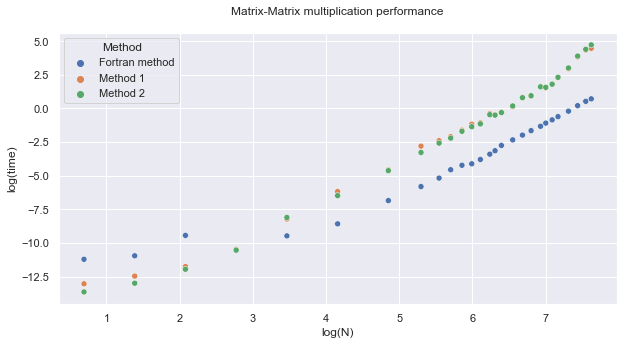

[  2.63839898 -16.76140009]


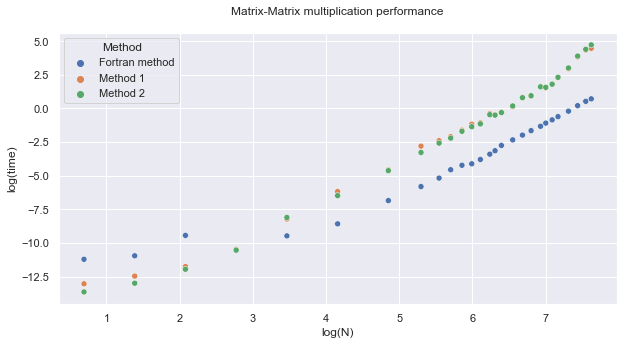

[  2.711073   -17.25577112]


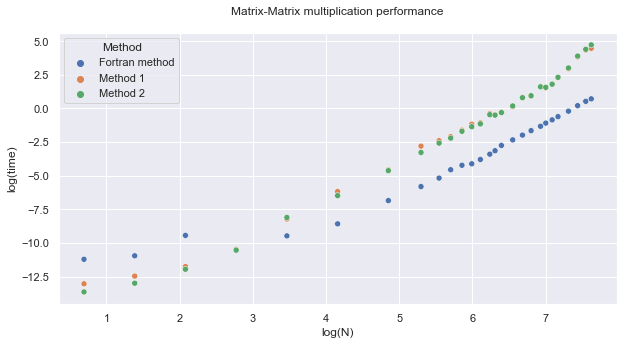

[  1.86382115 -14.59095831]


In [25]:
print(performance_matrixProduct('','Method 1'))
print(performance_matrixProduct('','Method 2'))
print(performance_matrixProduct('','Fortran method'))

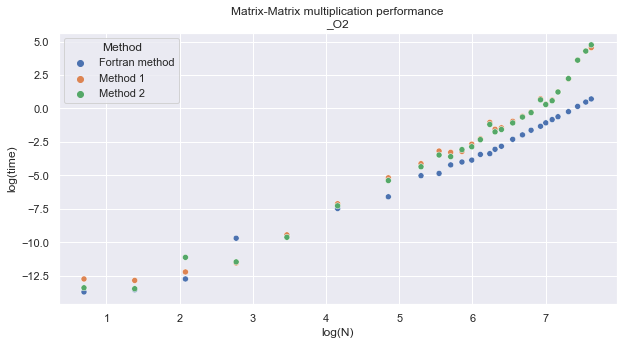

[  2.57619669 -17.30831238]


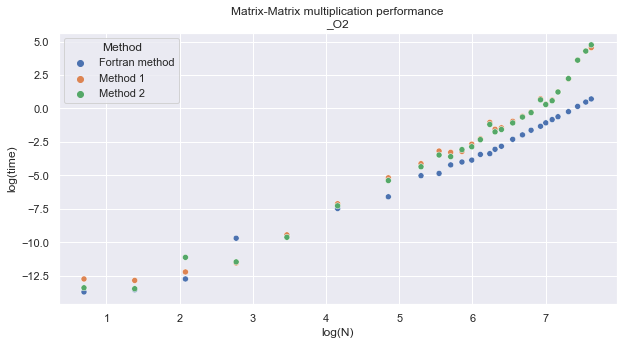

[  2.59841234 -17.51609383]


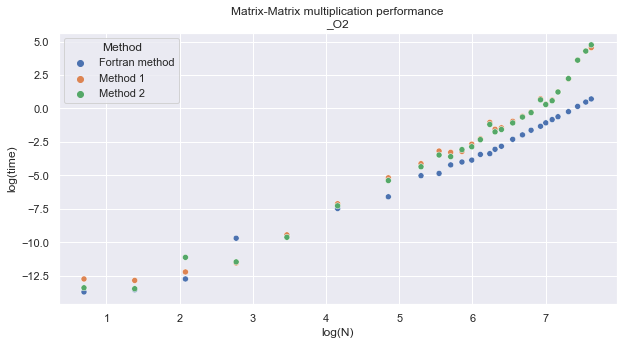

[  2.17863512 -16.50894446]


In [26]:
print(performance_matrixProduct('_O2','Method 1'))
print(performance_matrixProduct('_O2','Method 2'))
print(performance_matrixProduct('_O2','Fortran method'))

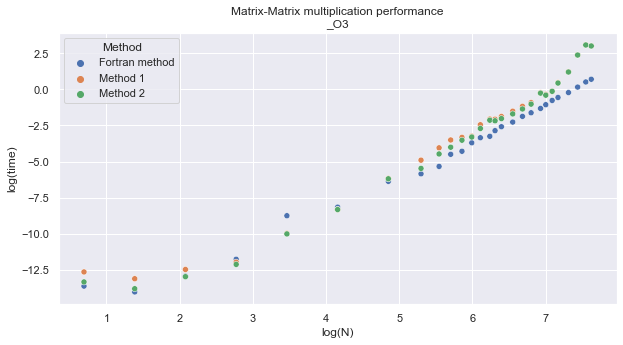

[  2.46257837 -17.34263778]


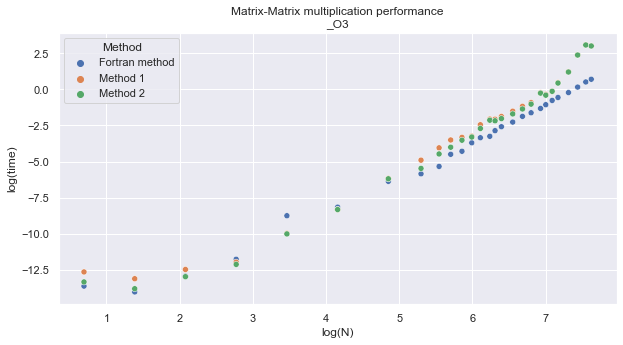

[  2.54004151 -17.96380187]


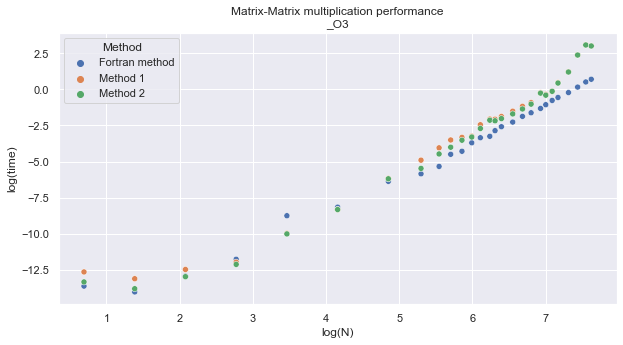

[  2.26580592 -17.10770477]


In [27]:
print(performance_matrixProduct('_O3','Method 1'))
print(performance_matrixProduct('_O3','Method 2'))
print(performance_matrixProduct('_O3','Fortran method'))

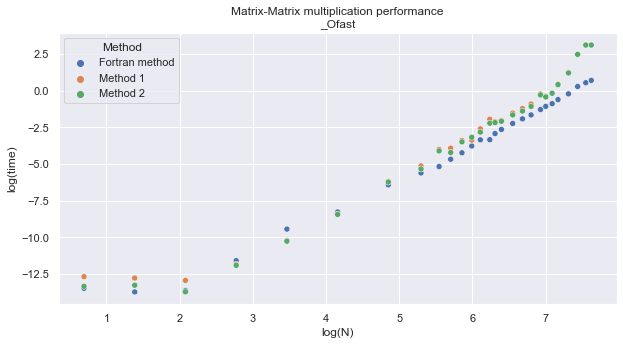

[  2.47162487 -17.43467006]


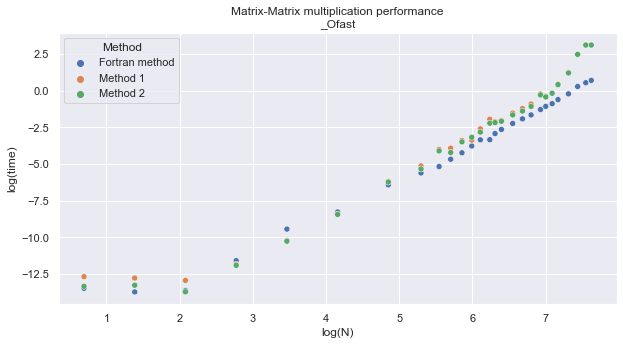

[  2.54581756 -17.99525466]


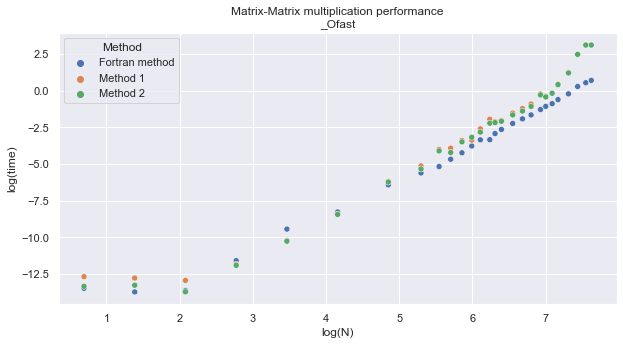

[  2.27977142 -17.21723966]


In [28]:
print(performance_matrixProduct('_Ofast','Method 1'))
print(performance_matrixProduct('_Ofast','Method 2'))
print(performance_matrixProduct('_Ofast','Fortran method'))